In [39]:
import os
from shutil import copy
from tqdm import tqdm, trange

In [10]:
base_path = './archive/lfw-deepfunneled/lfw-deepfunneled/'
people = os.listdir(base_path)

In [11]:
for i, person in tqdm(enumerate(people[:10])):
    print(i, base_path + person)

10it [00:00, 4997.98it/s]

0 ./archive/lfw-deepfunneled/lfw-deepfunneled/Aaron_Eckhart
1 ./archive/lfw-deepfunneled/lfw-deepfunneled/Aaron_Guiel
2 ./archive/lfw-deepfunneled/lfw-deepfunneled/Aaron_Patterson
3 ./archive/lfw-deepfunneled/lfw-deepfunneled/Aaron_Peirsol
4 ./archive/lfw-deepfunneled/lfw-deepfunneled/Aaron_Pena
5 ./archive/lfw-deepfunneled/lfw-deepfunneled/Aaron_Sorkin
6 ./archive/lfw-deepfunneled/lfw-deepfunneled/Aaron_Tippin
7 ./archive/lfw-deepfunneled/lfw-deepfunneled/Abbas_Kiarostami
8 ./archive/lfw-deepfunneled/lfw-deepfunneled/Abba_Eban
9 ./archive/lfw-deepfunneled/lfw-deepfunneled/Abdel_Aziz_Al-Hakim


In [14]:
os.getcwd()

'd:\\CV'

In [16]:
# copio in un'unica cartella e rinomino i file come 0.jpg, 1.jpg ecc.

i = 0
new_base_path = './data/original/'

for person in tqdm(people):
    for file_name in os.listdir(base_path + person):
        copy(base_path + person + '/' + file_name, new_base_path + f'{i}.jpg')
        i += 1

100%|██████████| 5749/5749 [01:05<00:00, 87.25it/s] 


adesso il preprocessing del tipo dell'articolo: prima un crop centrale e poi i due rumori NON CASUALI

## Cropping

In [48]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

(250, 250)
(112, 112)


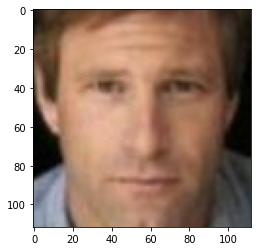

In [36]:
# https://stackoverflow.com/questions/16646183/crop-an-image-in-the-centre-using-pil

width = height = 250
new_width = new_height = 112

left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

cropped_base_path = './data/cropped/'

with Image.open(new_base_path + '0.jpg') as img:
    cropped_img = img.crop([left, top, right, bottom])
    plt.imshow(cropped_img)
    print(img.size)
    print(cropped_img.size)
    # cropped_img.save(cropped_base_path + 'test.jpg')

In [40]:
n_files = len(os.listdir(new_base_path))

for i in trange(n_files):
    file_name = f'{i}.jpg'
    with Image.open(new_base_path + file_name) as img:
        cropped_img = img.crop([left, top, right, bottom])
        cropped_img.save(cropped_base_path + file_name)

100%|██████████| 13233/13233 [01:03<00:00, 207.15it/s]


## Pixelization

In [41]:
i = 0
# new_base_path = './data/original/'

for person in tqdm(people):
    for file_name in os.listdir(base_path + person):
        if file_name == 'Jennifer_Aniston_0018.jpg': # quella che mostra
            print(i)
        i += 1

100%|██████████| 5749/5749 [00:00<00:00, 22442.94it/s]

6116


(112, 112, 3)
(14, 14, 3)


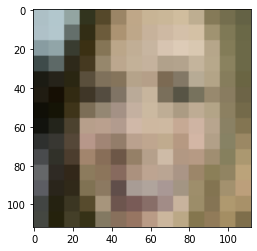

In [100]:
n = 14

with Image.open(cropped_base_path + '6116.jpg') as img:
    image_tiny = img.resize((n, n))
    pixelated = image_tiny.resize(img.size, Image.NEAREST) # NEAREST BILINEAR
    plt.imshow(pixelated)
    # print(type(img))
    print(np.asarray(img).shape)
    print(np.asarray(image_tiny).shape)

8


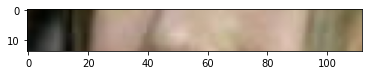

In [66]:
# 112/8 = 14 -> 14, 28, ..., 112

with Image.open(cropped_base_path + '6116.jpg') as img:
    x = np.asarray(img)
    y = np.split(x, 14 * np.arange(1, 8), axis = 0)
    print(len(y))
    plt.imshow(y[4])

In [67]:
14 * np.arange(1, 8)

array([14, 28, 42, 56, 70, 84, 98])

In [69]:
for i in range(8):
    v = 14 * np.array([i, i+1])
    print(v)

[ 0 14]
[14 28]
[28 42]
[42 56]
[56 70]
[70 84]
[84 98]
[ 98 112]


occhio, per imitare il tipo devo dividere 112 pixel in 14 blocchi da 8 pixel, non in 8 blocchi da 14

In [79]:
# with Image.open(cropped_base_path + '6116.jpg') as img:
#     x = np.asarray(img)
#     y = np.empty((8, 8, 3))

#     for j in range(8):
#         for i in range(8):
#             #print(x[14*i:14*(i+1), 14*j:14*(j+1), :].shape)
#             #print(x[14*i:14*(i+1), 14*j:14*(j+1), :].mean().shape)
#             for k in range(3):
#                 y[i, j, k] = x[14*i:14*(i+1), 14*j:14*(j+1), k].mean()

with Image.open(cropped_base_path + '6116.jpg') as img:
    x = np.asarray(img)
    y = np.empty((14, 14, 3))

    for j in range(14): # y img
        for i in range(14): # x img
            for k in range(3): # rgb channel
                y[i, j, k] = x[8*i:8*(i+1), 8*j:8*(j+1), k].mean()

In [80]:
y.shape

(14, 14, 3)

In [90]:
x[:8, :8, 1].mean()

191.0

In [92]:
y[0]

array([[172.      , 191.      , 197.      ],
       [174.875   , 194.125   , 199.96875 ],
       [153.25    , 172.09375 , 168.703125],
       [ 47.109375,  48.96875 ,  27.      ],
       [ 84.90625 ,  71.28125 ,  41.984375],
       [155.9375  , 134.03125 , 103.03125 ],
       [189.390625, 165.484375, 135.09375 ],
       [199.515625, 179.6875  , 148.140625],
       [202.015625, 182.828125, 151.515625],
       [206.875   , 187.828125, 156.5625  ],
       [189.171875, 173.53125 , 144.65625 ],
       [130.25    , 119.734375,  85.515625],
       [114.578125, 108.984375,  77.109375],
       [100.      ,  97.6875  ,  68.5625  ]])

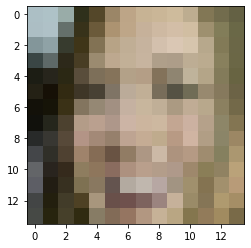

In [101]:
plt.imshow(y.astype(int))

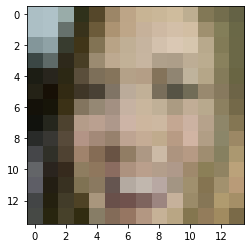

In [105]:
plt.imshow(y.round(0).astype(int))

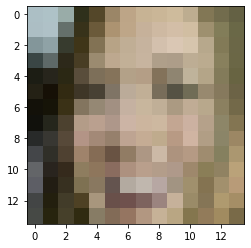

In [106]:
plt.imshow(np.uint8(y))

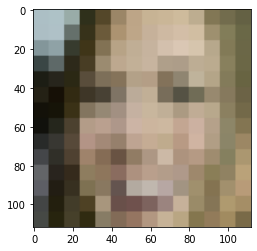

In [109]:
z = Image.fromarray(np.uint8(y))
plt.imshow(z.resize(img.size, Image.NEAREST))

In [110]:
def pixelate(img, n_squares = 14, sides_squares = 8):
    x = np.asarray(img) # img è PIL..., non un array
    y = np.empty((n_squares, n_squares, 3))

    for j in range(n_squares): # y img
        for i in range(n_squares): # x img
            for k in range(3): # rgb channel
                y[i, j, k] = x[sides_squares*i:sides_squares*(i+1), sides_squares*j:sides_squares*(j+1), k].mean()
                
    return Image.fromarray(np.uint8(y)).resize(img.size, Image.NEAREST)

In [111]:
pixelated_base_path = './data/pixelated/'

for i in trange(n_files):
    file_name = f'{i}.jpg'
    with Image.open(cropped_base_path + file_name) as img:
        pixelated_img = pixelate(img)
        pixelated_img.save(pixelated_base_path + file_name)

100%|██████████| 13233/13233 [01:11<00:00, 185.63it/s]


## Gaussian blur

In [115]:
#from scipy.ndimage import gaussian_filter
from skimage.filters import gaussian

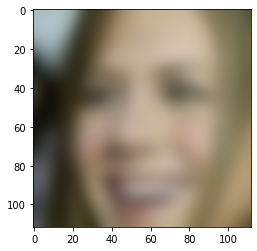

In [127]:
with Image.open(cropped_base_path + '6116.jpg') as img:
    # https://stackoverflow.com/questions/55319949/pil-typeerror-cannot-handle-this-data-type
    blurred_img = (gaussian(np.asarray(img), sigma = 4, channel_axis = 2) * 255).astype(np.uint8)
    blurred_img = Image.fromarray(blurred_img)
    plt.imshow(blurred_img)

In [129]:
blurred_base_path = './data/blurred/'

for i in trange(n_files):
    file_name = f'{i}.jpg'
    with Image.open(cropped_base_path + file_name) as img:
        #blurred_img = Image.fromarray(gaussian_filter(img, sigma = 4))
        blurred_img = (gaussian(np.asarray(img), sigma = 4, channel_axis = 2) * 255).astype(np.uint8)
        blurred_img = Image.fromarray(blurred_img)
        blurred_img.save(blurred_base_path + file_name)

100%|██████████| 13233/13233 [00:36<00:00, 359.10it/s]
